# AnDiAnomalousDiffusion
## Task1 - 1D

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils import Series, test_analysis_alpha

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from hyperopt import hp, tpe, Trials, fmin

random_num = 9

### Zero-padding

* Raw data

In [9]:
series = Series()
series.read("task1.txt")

In [10]:
x,y = series.get(range(10000),1)

In [16]:
xtr,xtest,ytr,ytest = train_test_split(x,y,test_size=0.3,random_state=random_num)

In [21]:
# Bayesian optimization with 5-fold CV

# Black-box objective function to optimize
def objective(params,n_fold=5):
    
    # We force hyperparameters to be integers
    for parameter_name in ['n_estimators', 'max_depth', 'min_samples_split',"min_samples_leaf"]:
        params[parameter_name] = int(params[parameter_name])

    np.random.seed(2020)
    rf = RandomForestRegressor(random_state=random_num,criterion="mse",n_jobs=-1)
    rf.set_params(**params)
    cv = cross_validate(rf,xtr,ytr,cv=n_fold,scoring="neg_mean_absolute_error",n_jobs=-1)
    mae = cv["test_score"].mean()

    return -mae

# Defining hyperparameter space. quniform returns integer values from a uniform distribution
# quniform(min,max,irrelevant parameter set to 2) == uniform distro between min and max
space = {
    "n_estimators": hp.quniform("n_estimators",1,60,2), 
    "max_depth": hp.quniform("max_depth",1,40,2),
    "min_samples_split": hp.quniform("min_samples_split",2,60,2),
    "min_samples_leaf": hp.quniform("min_samples_leaf",2,40,2)
}

# Defining optimization algorithm (Tree Parzen Estimator)
tpe_algo = tpe.suggest

# Object to save data from optimization process. See more at https://github.com/hyperopt/hyperopt/wiki/FMin
bayes_trials = Trials()

In [22]:
# Function to run bayesian optimization process. max_evals = iterations, the bigger the better, but it takes longer.
best = fmin(fn = objective, space = space, algo = tpe_algo, max_evals = 6, trials = bayes_trials)

100%|██████████| 6/6 [11:09<00:00, 111.58s/trial, best loss: 0.3070440044047523]


In [23]:
# Best model hyperparameters are saved in best
best

{'max_depth': 32.0,
 'min_samples_leaf': 6.0,
 'min_samples_split': 48.0,
 'n_estimators': 46.0}

In [31]:
# Now we train and test the best model found
rf = RandomForestRegressor(random_state=random_num,criterion="mse",n_jobs=-1)
best = {key:int(val) for key,val in best.items()}
rf.set_params(**best)

rf.fit(xtr,ytr)

RandomForestRegressor(max_depth=32, min_samples_leaf=6, min_samples_split=48,
                      n_estimators=46, n_jobs=-1, random_state=9)

In [32]:
pred = rf.predict(xtest)

MAE = 0.3001 



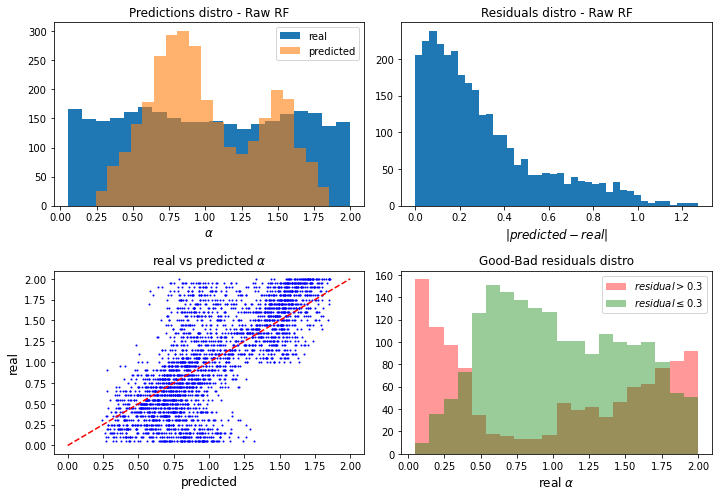

In [33]:
test_analysis_alpha(pred,ytest)

* Preprocessed data with $T_{lag} = 1$

In [38]:
W = np.diff(x,n=1,axis=1)
What = W/W.std(axis=1)[:,None]
x_lag = np.cumsum(What,axis=1)

In [39]:
xtr_lag,xtest_lag,ytr,ytest = train_test_split(x_lag,y,test_size=0.3,random_state=random_num)

In [42]:
# Bayesian optimization with 5-fold CV

def objective(params,n_fold=5):
    
    # We force hyperparameters to be integers
    for parameter_name in ['n_estimators', 'max_depth', 'min_samples_split',"min_samples_leaf"]:
        params[parameter_name] = int(params[parameter_name])

    np.random.seed(2020)
    rf = RandomForestRegressor(random_state=random_num,criterion="mse",n_jobs=-1)
    rf.set_params(**params)
    cv = cross_validate(rf,xtr_lag,ytr,cv=n_fold,scoring="neg_mean_absolute_error",n_jobs=-1)
    mae = cv["test_score"].mean()

    return -mae

# Defining hyperparameter space. quniform returns integer values from a uniform distribution
# quniform(min,max,irrelevant parameter set to 2) == uniform distro between min and max
space = {
    "n_estimators": hp.quniform("n_estimators",1,60,2), 
    "max_depth": hp.quniform("max_depth",1,40,2),
    "min_samples_split": hp.quniform("min_samples_split",2,60,2),
    "min_samples_leaf": hp.quniform("min_samples_leaf",2,40,2)
}

# Defining optimization algorithm (Tree Parzen Estimator)
tpe_algo = tpe.suggest

# Object to save data from optimization process. See more at https://github.com/hyperopt/hyperopt/wiki/FMin
bayes_trials_lag = Trials()

In [43]:
# Function to run bayesian optimization process. max_evals = iterations, the bigger the better, but it takes longer.
best_lag = fmin(fn = objective, space = space, algo = tpe_algo, max_evals = 6, trials = bayes_trials_lag)

100%|██████████| 6/6 [15:05<00:00, 150.90s/trial, best loss: 0.3760558635292716] 


In [44]:
best_lag

{'max_depth': 22.0,
 'min_samples_leaf': 16.0,
 'min_samples_split': 36.0,
 'n_estimators': 38.0}

In [45]:
rf_lag = RandomForestRegressor(random_state=random_num,criterion="mse",n_jobs=-1)
best_lag = {key:int(val) for key,val in best_lag.items()}
rf_lag.set_params(**best_lag)

rf_lag.fit(xtr_lag,ytr)

RandomForestRegressor(max_depth=22, min_samples_leaf=16, min_samples_split=36,
                      n_estimators=38, n_jobs=-1, random_state=9)

MAE = 0.3795 



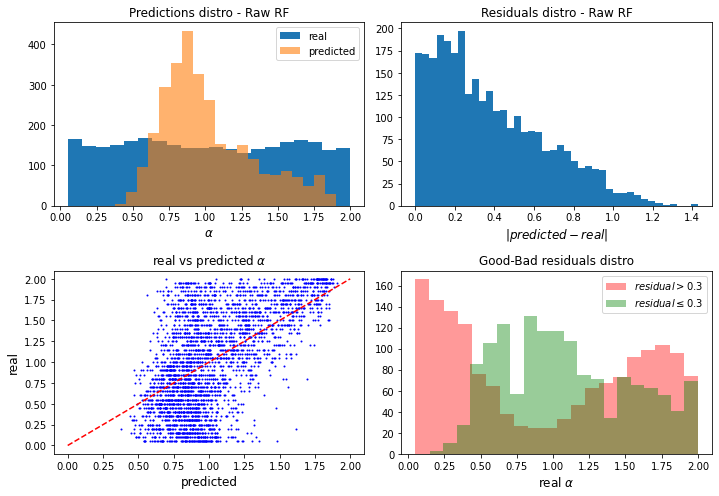

In [46]:
pred = rf_lag.predict(xtest_lag)
test_analysis_alpha(pred,ytest)